# Evaluation Metrics

## 1. Confusion Matrix

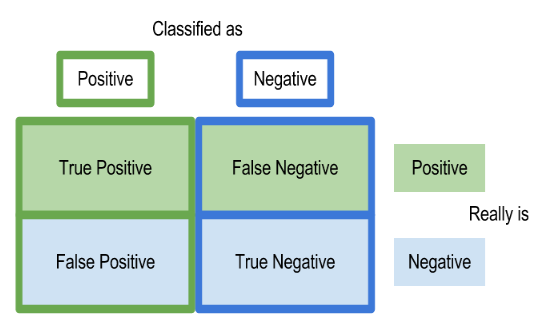

In [2]:
from IPython.display import Image
Image(filename='confusion matrix.png')

* Type 1 error and FP
  * Type 1 error is rejecting the null hypothesis when its actually true. 
  * False Positive is also called Type 1 error.

* Type 2 error and FN
  * Type 2 error is accepting the null hypothesis when its actually false
  * False Negative is also called Type 2 error.

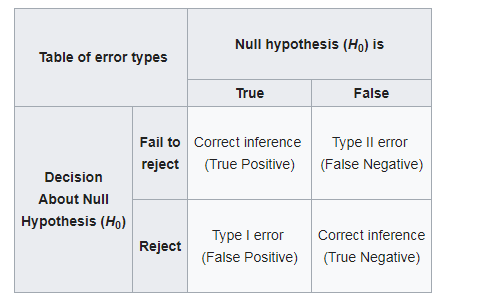

In [2]:
from IPython.display import Image
Image(filename='type of errors.png')

## 2. Point Metrics
* Accuracy = (tp + tn) / (tp + tn + fp  fn)
* Sensitivity = recall = tp / t = tp / (tp + fn)
* Specificity = tn / n = tn / (tn + fp)
* Precision = tp / p = tp / (tp + fp)
* $F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}=2\times\frac{precision\times recall}{precision+recall}$
* Matthews correlation coefficient (MCC) = $\frac{TP\times TN - FP\times FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$

### Relation between Sensitivity, Specificity, FPR and Threshold
Sensitivity and Specificity are inversely propotional to each other.
* Threshold $\downarrow$, Sensitivity $\uparrow$, Specificity $\downarrow$
* Threshold $\uparrow$, Sensitivity $\downarrow$, Specificity $\uparrow$
* TPR $\uparrow$, FPR $\uparrow$
* TPR $\downarrow$, FPR $\downarrow$

## 3. Tradeoff
### Sensitivity & Specificity
__ROC (Receiver Operating Characteristics)__

This curve plots two parameters:
  * TPR (= Sensitivity) 
  * FPR (= 1 - Specificity)

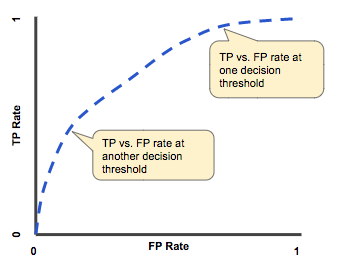

In [4]:
from IPython.display import Image
Image(filename='ROC.png')

AUC ROC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example.

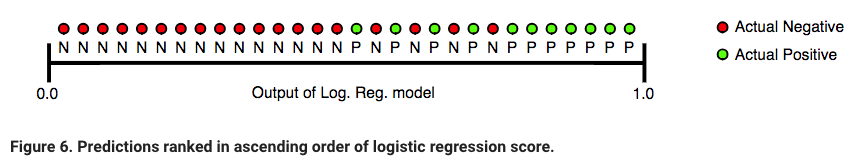

In [3]:
from IPython.display import Image
Image(filename='logreg.png')

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

### Precision & Recall
__Precision Recall curve__

This curve plots two parameters:
  * Precision
  * Recall
  
__Area under PRC__ = Average Precision

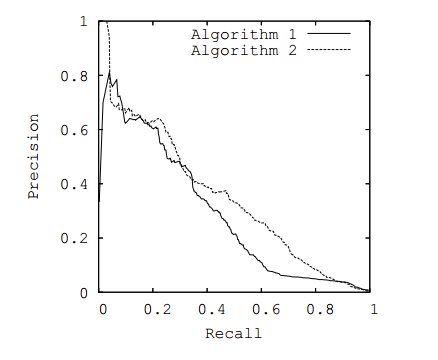

In [2]:
from IPython.display import Image
Image(filename='PRCurve.png')

Area under PRC = Average Precision. Intuition: By randomly picking the threshold, what’s the expected precision?

Getting a bunch of positives in the sequence increases both precision and recall (hence curve climbs up slowly), but getting a bunch of negatives in the sequence drops the precision without increasing recall. Hence, by definition, curve has only slow climbs and vertical drops.

### Differences between ROC AUC and PR AUC
Since PR does not account for true negatives (as TN is not a component of either Precision or Recall), or there are many more negatives than positives (a characteristic of class imbalance problem), use PR. If not, use ROC.


__Class Imbalance: Metrics__
* Accuracy: Blindly predict majority class.
* Log-Loss: Majority class can dominate the loss.
* AUROC: Easy to keep AUC high by scoring most negatives very low.
* AUPRC: Somewhat more robust than AUROC. But other challenges.
  - What kind of interpolation? AUCNPR?
  
In general: Accuracy << AUROC << AUPRC

## 4. How to handle imbalanced data
### a. Use the right evaluation metrics
* Precision/Specificity: how many selected instances are relevant.
* Recall/Sensitivity: how many relevant instances are selected.
* F1 score: harmonic mean of precision and recall.
* MCC: correlation coefficient between the observed and predicted binary classifications.
* AUC: relation between true-positive rate and false positive rate.

### b. Resample the training set
* Under-sampling

Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

* Over-sampling

On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique).

### c. Use K-fold Cross-Validation in the right way
It should be used before over-sampling the data.

### d. Ensemble different resampled datasets
Given that you want to ensemble 10 models, you would keep e.g. the 1.000 cases of the rare class and randomly sample 10.000 cases of the abundant class. Then you just split the 10.000 cases in 10 chunks and train 10 different models.

### e. Resample with different ratios

### f. Cluster the abundant class
Cluster the abundant class in r groups, with r being the number of cases in r. For each group, only the medoid (centre of cluster) is kept. The model is then trained with the rare class and the medoids only.


### g. Design your own model

## 5. Reference

http://cs229.stanford.edu/section/evaluation_metrics.pdf

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc

https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html